### C. Elegans

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
G = nx.read_gml('networks/celegansneural.gml', label = 'id')
G = nx.Graph(G)

In [19]:
# distribuição empírica (faça um gráfico com
# as diferentes redes).

n_V = G.number_of_nodes()
n_E = G.number_of_edges()
print(f"Number of nodes: {n_V}")
print(f"Number of edges: {n_E}")
print(f"Directed graph: {nx.is_directed(G)}")
print(f"Connected graph: {nx.is_connected(G)}")
print(f"Connected components: {nx.number_connected_components(G)}")

Number of nodes: 297
Number of edges: 2148
Directed graph: False
Connected graph: True
Connected components: 1


In [4]:
# Degree
degrees = np.array([int(dg) for (node, dg) in G.degree()])
print(f"Max: {degrees.max()}")
print(f"Min: {degrees.min()}")
print(f"Mean: {degrees.mean()}")
print(f"Median: {np.median(degrees)}")
print(f"Std: {degrees.std()}")


Max: 134
Min: 1
Mean: 14.464646464646465
Median: 12.0
Std: 12.944309461455846


In [5]:
# Distance
if nx.is_connected(G):
    d_mean = nx.average_shortest_path_length(G)
    print(f"{d_mean}")

dist = dict(nx.all_pairs_shortest_path_length(G))
distas = list()
for i in dist.values():
    distas = distas+list(i.values())
distas = np.array(distas)
distas = distas[distas != 0]
print(f"Max: {distas.max()}")
print(f"Min: {distas.min()}")
print(f"Mean: {distas.mean()}")
print(f"Median: {np.median(distas)}")
print(f"Std: {distas.std()}")

2.455318955318955
Max: 5
Min: 1
Mean: 2.455318955318955
Median: 2.0
Std: 0.672362482827466


In [6]:
# Cluster
cluster = np.array(list(nx.clustering(G).values()))
print(f"Max: {cluster.max()}")
print(f"Min: {cluster.min()}")
print(f"Mean: {cluster.mean()}")
print(f"Median: {np.median(cluster)}")
print(f"Std: {cluster.std()}")
print(f"Global: {nx.transitivity(G)}")

Max: 1.0
Min: 0.0
Mean: 0.2923632978321902
Median: 0.2789473684210526
Std: 0.17276583380718566
Global: 0.18071147126607687


In [7]:
# Degree centrality
dc = np.array(list(nx.degree_centrality(G).values()))
print(f"Max: {dc.max()}")
print(f"Min: {dc.min()}")
print(f"Mean: {dc.mean()}")
print(f"Median: {np.median(dc)}")
print(f"Std: {dc.std()}")

Max: 0.45270270270270274
Min: 0.0033783783783783786
Mean: 0.04886704886704887
Median: 0.04054054054054054
Std: 0.0437307752076211


In [8]:
# Betweeness centrality
bc = np.array(list(nx.betweenness_centrality(G).values()))
print(f"Max: {bc.max()}")
print(f"Min: {bc.min()}")
print(f"Mean: {bc.mean()}")
print(f"Median: {np.median(bc)}")
print(f"Std: {bc.std()}")

Max: 0.3033972016765733
Min: 0.0
Mean: 0.0049332845943015425
Median: 0.0016282512623438119
Std: 0.018753992560472117


In [9]:
# Closeness centrality
cloc = np.array(list(nx.closeness_centrality(G).values()))
print(f"Max: {cloc.max()}")
print(f"Min: {cloc.min()}")
print(f"Mean: {cloc.mean()}")
print(f"Median: {np.median(cloc)}")
print(f"Std: {cloc.std()}")

Max: 0.597979797979798
Min: 0.29191321499013806
Mean: 0.4122662533104332
Median: 0.4134078212290503
Std: 0.0444087997234796


In [10]:
# Eigenvector centrality
ec = np.array(list(nx.eigenvector_centrality(G).values()))
print(f"Max: {ec.max()}")
print(f"Min: {ec.min()}")
print(f"Mean: {ec.mean()}")
print(f"Median: {np.median(ec)}")
print(f"Std: {ec.std()}")

Max: 0.22936501240407212
Min: 0.002274788308896905
Mean: 0.04360016109249201
Median: 0.033899172969253336
Std: 0.03828876231627383


In [11]:
# Katz centrality
kc = np.array(list(nx.katz_centrality_numpy(G).values()))
print(f"Max: {kc.max()}")
print(f"Min: {kc.min()}")
print(f"Mean: {kc.mean()}")
print(f"Median: {np.median(kc)}")
print(f"Std: {kc.std()}")

Max: 0.20580025736887517
Min: -0.17853638665230373
Mean: 0.005835341992803423
Median: -0.006031100888660397
Std: 0.05773172568727174


In [12]:
# PageRank centrality
pr = np.array(list(nx.pagerank(G).values()))
print(f"Max: {pr.max()}")
print(f"Min: {pr.min()}")
print(f"Mean: {pr.mean()}")
print(f"Median: {np.median(pr)}")
print(f"Std: {pr.std()}")

Max: 0.03349861980982593
Min: 0.0006947487934045138
Mean: 0.0033670033670033664
Median: 0.0028316462202387527
Std: 0.0027349664415114096


In [13]:
# VoteRank centrality
vr = np.array(nx.voterank(G))
print(f"Max: {vr.max()}")
print(f"Min: {vr.min()}")
print(f"Mean: {vr.mean()}")
print(f"Median: {np.median(vr)}")
print(f"Std: {vr.std()}")

Max: 284
Min: 1
Mean: 128.1948717948718
Median: 124.0
Std: 78.8281023321712


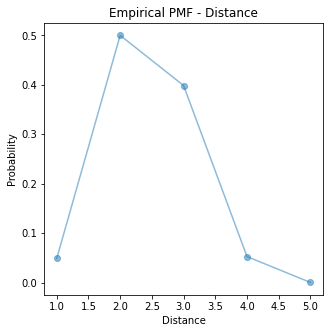

In [14]:
# PMF
x, f_k = np.unique(distas, return_counts=True)
pmf = f_k/f_k.sum()

plt.figure(figsize=(5,5))
plt.title('Empirical PMF - Distance')
plt.xlabel('Distance')
plt.ylabel('Probability')

plt.scatter(x, pmf, alpha=0.5)
plt.plot(x, pmf, alpha=0.5)
plt.show()

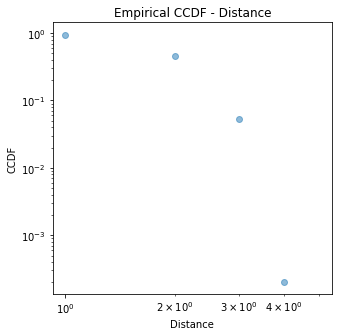

In [15]:
# CCDF
cdf = f_k.cumsum()/f_k.sum()
ccdf = 1-cdf

plt.figure(figsize=(5,5))
plt.scatter(x, ccdf, alpha=0.5)
plt.title('Empirical CCDF - Distance')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Distance')
plt.ylabel('CCDF')

plt.show()

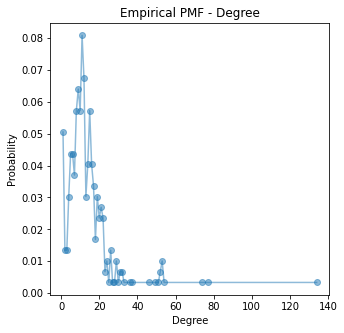

In [16]:
# PMF
x_g, f_k_g = np.unique(degrees, return_counts=True)
pmf_g = f_k_g/f_k_g.sum()

plt.figure(figsize=(5,5))
plt.title('Empirical PMF - Degree')
plt.xlabel('Degree')
plt.ylabel('Probability')

plt.scatter(x_g, pmf_g, alpha=0.5)
plt.plot(x_g, pmf_g, alpha=0.5)
plt.show()

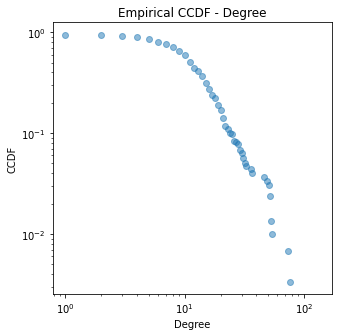

In [17]:
# CCDF
cdf_g = f_k_g.cumsum()/f_k_g.sum()
ccdf_g = 1-cdf_g

plt.figure(figsize=(5,5))
plt.scatter(x_g, ccdf_g, alpha=0.5)
plt.title('Empirical CCDF - Degree')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('CCDF')

plt.show()

In [18]:
np.savetxt('data/celegans-dista-x.txt', x, delimiter=',', fmt='%d')
np.savetxt('data/celegans-dista-pmf.txt', pmf, delimiter=',', fmt='%f')
np.savetxt('data/celegans-dista-ccdf.txt', ccdf, delimiter=',', fmt='%f')

np.savetxt('data/celegans-degree-x.txt', x_g, delimiter=',', fmt='%d')
np.savetxt('data/celegans-degree-pmf.txt', pmf_g, delimiter=',', fmt='%f')
np.savetxt('data/celegans-degree-ccdf.txt', ccdf_g, delimiter=',', fmt='%f')